# 서대문구 공공자전거 수요불균형 문제 파악을 위한 EDA

### 라이브러리 호출 및 데이터 프레임 생성

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import os
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("/Users/parkjunhyeok/Desktop/codit/프로젝트/초급프로젝트/data/선별자치구_자치구별_대여가능자전거_거치대수.csv", encoding='CP949')
df.head(3)

,Unnamed: 0,일시,대여소 번호,보관소(대여소)명,시간대,거치대수량,자치구,거치대수
0,10,2023-01-01,115,115. 마스타 빌딩 앞,0,13,서대문구,15
1,11,2023-01-01,117,117. 홍은사거리,0,11,서대문구,23
2,17,2023-01-01,123,123. 문화촌 공원,0,13,서대문구,20


In [49]:
from matplotlib import font_manager

font_path = "/Users/parkjunhyeok/Desktop/codit/스프린트미션/미션6/Nanum_Gothic/NanumGothic-Regular.ttf"
# FontProperties를 이용해 폰트 설정
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()  # matplotlib에 폰트 적용
plt.rcParams['axes.unicode_minus'] = False         # 음수 부호 깨짐 방지

In [50]:
# 'Unnamed: 0' 컬럼 삭제
df = df.drop(columns='Unnamed: 0')

In [51]:
df.head(3)

,일시,대여소 번호,보관소(대여소)명,시간대,거치대수량,자치구,거치대수
0,2023-01-01,115,115. 마스타 빌딩 앞,0,13,서대문구,15
1,2023-01-01,117,117. 홍은사거리,0,11,서대문구,23
2,2023-01-01,123,123. 문화촌 공원,0,13,서대문구,20


### 중구 필터링

In [52]:
# 서대문구만 선별
region_df = df[df['자치구'] == '중구']
region_df.head(3)

,일시,대여소 번호,보관소(대여소)명,시간대,거치대수량,자치구,거치대수
39,2023-01-01,300,300. 정동사거리,0,0,중구,6
40,2023-01-01,310,310. 청계광장 옆,0,0,중구,8
41,2023-01-01,318,318. 광교사거리 남측,0,0,중구,10


In [80]:
tmp['거치대수'].mean()

11.39080459770115

In [53]:
tmp = region_df.groupby(['보관소(대여소)명','시간대']).mean(numeric_only=True)[['거치대수량','거치대수']]
tmp.head(24)

거치대수량  거치대수
보관소(대여소)명  시간대                
300. 정동사거리 0    1.171307   6.0
           1    1.186200   6.0
           2    1.168481   6.0
           3    1.171307   6.0
           4    1.132263   6.0
           5    1.192435   6.0
           6    1.401322   6.0
           7    1.532547   6.0
           8    2.558239   6.0
           9    3.459396   6.0
           10   3.338839   6.0
           11   3.140152   6.0
           12   2.870739   6.0
           13   2.874527   6.0
           14   3.294034   6.0
           15   3.110795   6.0
           16   2.814867   6.0
           17   2.112322   6.0
           18   1.473485   6.0
           19   1.503314   6.0
           20   1.558712   6.0
           21   1.465909   6.0
           22   1.301136   6.0
           23   1.190431   6.0

### 수요지수로 TOP10 대여소 선별

In [54]:
# 수요지수 TOP10 대여소 선별
tmp = region_df.groupby(['보관소(대여소)명']).mean(numeric_only=True)[['거치대수량','거치대수']]
tmp['수요지수'] = (tmp['거치대수'] - tmp['거치대수량'])/tmp['거치대수']
tmp.sort_values(by='수요지수',ascending=False).head(10)

,거치대수량,거치대수,수요지수
보관소(대여소)명,,,
484.도동삼거리,1.764816,12.0,0.852932
469.회현역 1번출구,1.960701,11.0,0.821754
470.회현역 7번출구,2.373657,13.0,0.817411
4772. 중앙일보,2.046907,10.0,0.795309
4776. 신세계면세점,2.193973,10.0,0.780603
322. 명동성당 앞,2.316522,10.0,0.768348
435. SK 남산빌딩,2.358048,10.0,0.764195
4753. 시청역 10번출구,2.532194,10.0,0.746781
321. KEB 하나금융그룹 명동사옥 옆,3.885946,15.0,0.740937


In [60]:
places = ['484.도동삼거리', '469.회현역 1번출구', '470.회현역 7번출구',
          '4772. 중앙일보', '4776. 신세계면세점', '322. 명동성당 앞',
          '435. SK 남산빌딩', '4753. 시청역 10번출구', '321. KEB 하나금융그룹 명동사옥 옆',
          '4752. 삼성사이버빌리지아파트']

tmp_10 = region_df[region_df['보관소(대여소)명'].isin(places)].copy()

In [61]:
tmp_10

,일시,대여소 번호,보관소(대여소)명,시간대,거치대수량,자치구,거치대수
43,2023-01-01,321,321. KEB 하나금융그룹 명동사옥 옆,0,0,중구,15
44,2023-01-01,322,322. 명동성당 앞,0,5,중구,10
73,2023-01-01,435,435. SK 남산빌딩,0,3,중구,10
81,2023-01-01,469,469.회현역 1번출구,0,1,중구,11
82,2023-01-01,470,470.회현역 7번출구,0,3,중구,13
...,...,...,...,...,...,...,...
16957770,2023-03-15,484,484.도동삼거리,23,5,중구,12
16957963,2023-03-15,4752,4752. 삼성사이버빌리지아파트,23,13,중구,7
16957964,2023-03-15,4753,4753. 시청역 10번출구,23,1,중구,10
16957971,2023-03-15,4772,4772. 중앙일보,23,0,중구,10


In [57]:
tmp_10['거치대수'].mean()

10.428571428571429

### 수요지수 TOP 10 대여소 시각화

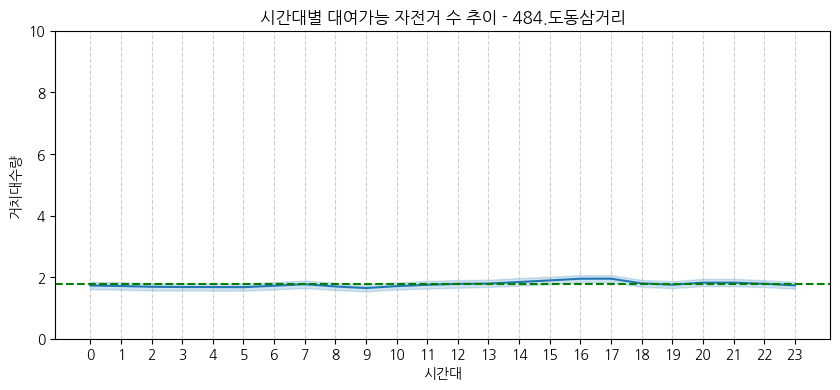

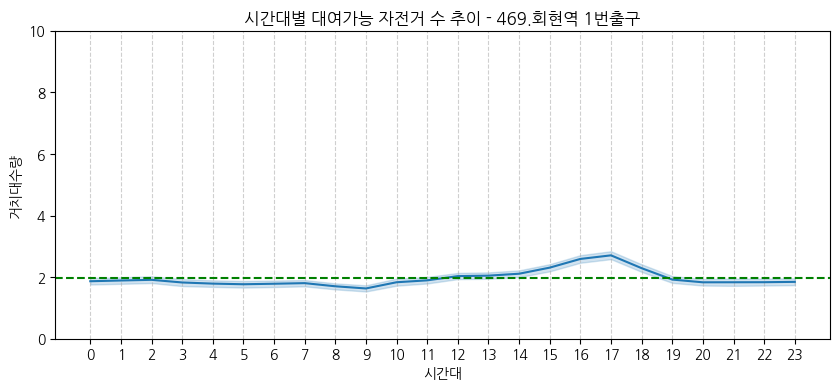

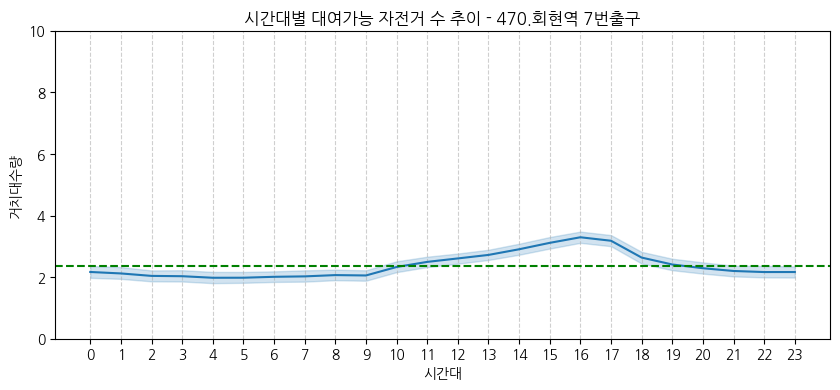

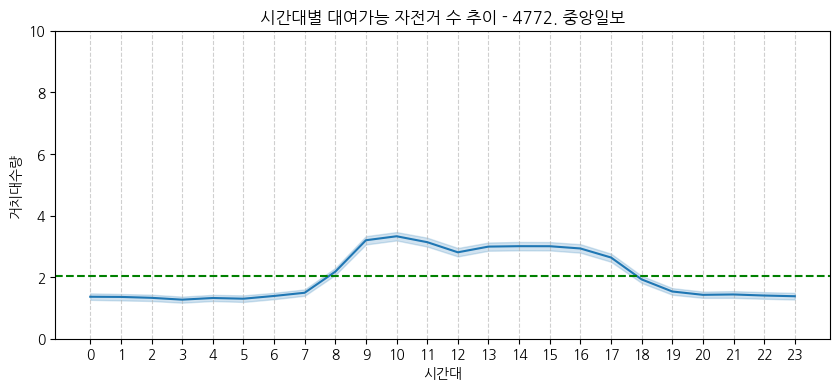

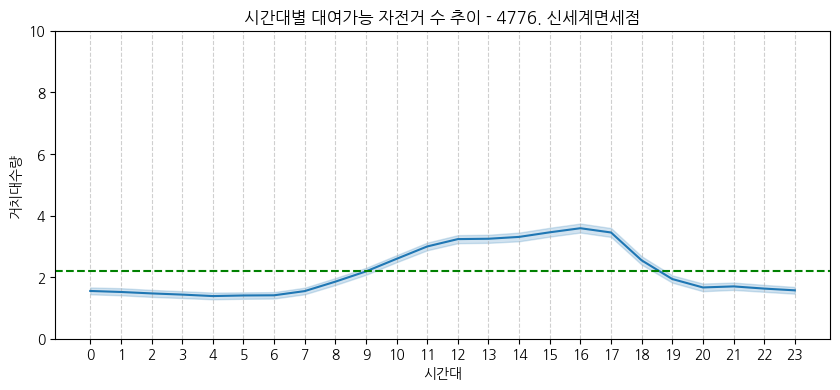

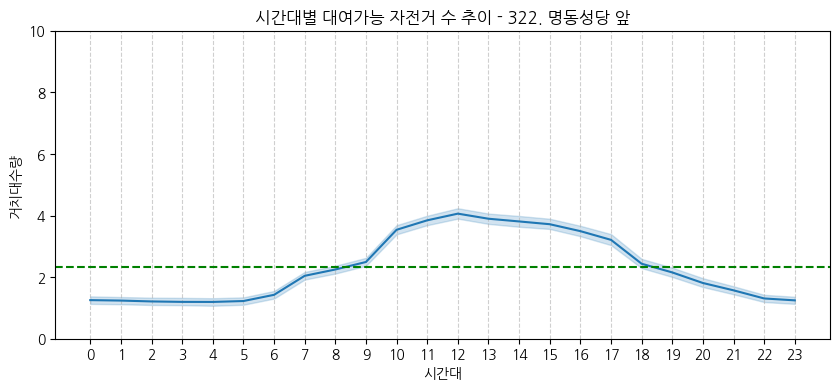

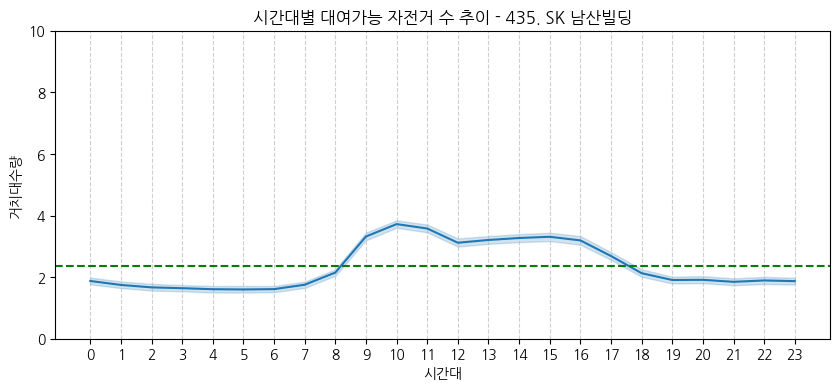

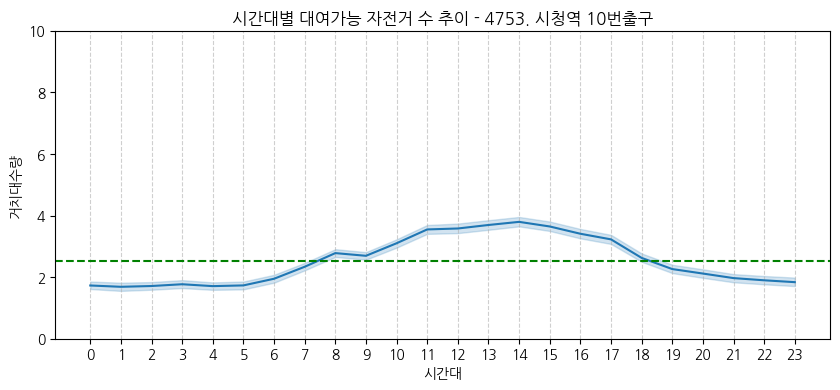

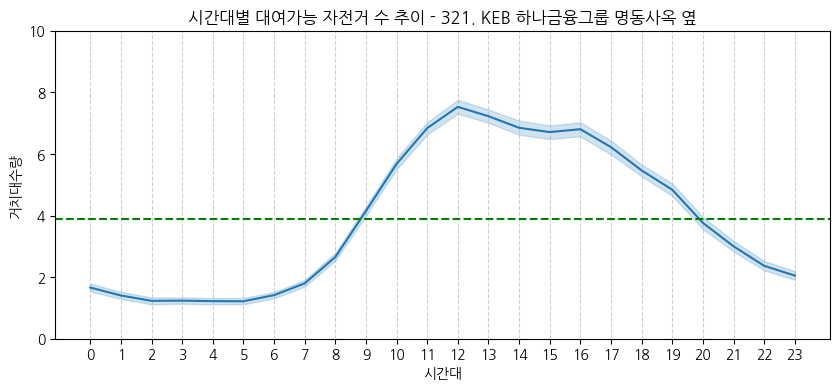

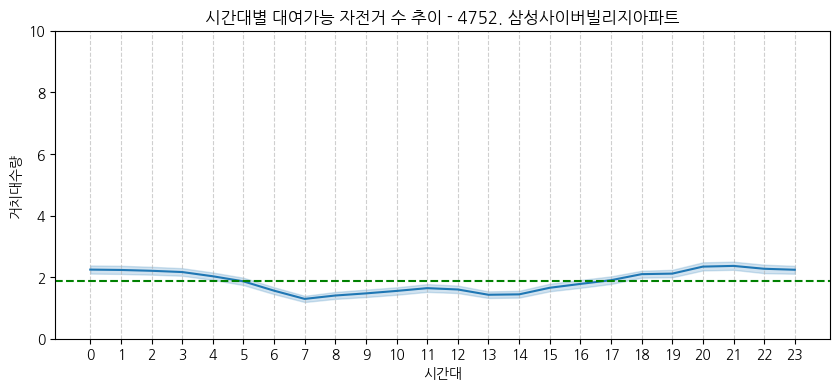

In [62]:
#수요지수 TOP 10 대여소 시각화
places = ['484.도동삼거리', '469.회현역 1번출구', '470.회현역 7번출구',
          '4772. 중앙일보', '4776. 신세계면세점', '322. 명동성당 앞',
          '435. SK 남산빌딩', '4753. 시청역 10번출구', '321. KEB 하나금융그룹 명동사옥 옆',
          '4752. 삼성사이버빌리지아파트']

for place in places:
    tmp_df = tmp_10[tmp_10['보관소(대여소)명'] == place]
    tmp_df["변화량"] = tmp_df["거치대수량"].diff().fillna(0).abs()

    #하이라이트 기준 점
    threshold = 0.4
    highlight = tmp_df[tmp_df["변화량"] > threshold]

    #평균값 계산
    mean_value = tmp_df["거치대수량"].mean()

    plt.figure(figsize=(10,4))
    sns.lineplot(tmp_df,x='시간대',y='거치대수량')

    # 평균선 추가
    plt.axhline(y=mean_value, color="green", linestyle="--", label=f"평균선: {mean_value:.2f}")
    plt.xticks(range(0, 24))
    plt.title(f'시간대별 대여가능 자전거 수 추이 - {place}')
    plt.ylim(0,10)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.show()

places = ['484.도동삼거리', '469.회현역 1번출구', '470.회현역 7번출구',
          '4772. 중앙일보', '4776. 신세계면세점', '322. 명동성당 앞',
          '435. SK 남산빌딩', '4753. 시청역 10번출구', '321. KEB 하나금융그룹 명동사옥 옆',
          '4752. 삼성사이버빌리지아파트']


### 2024년기준 도동삼거리는 대여소가 없어짐 따라서 수요지수가 가장 높은 회현역 1번출구와 회현역 7번출구를 선정

## 주변역과 대여소를 그래프로 분석

-  '324. 신세계백화점 본점 앞', '466.롯데호텔', '433. 을지로입구역 2번출구', '4762. 국제빌딩','433. 을지로입구역 8번출구','435. SK남산빌딩','471. 회현사거리 남측','4776. 신세계면세점'

In [72]:
region_df['보관소(대여소)명'].unique()

array(['300. 정동사거리', '310. 청계광장 옆', '318. 광교사거리 남측', '320. 을지로입구역 4번출구 앞',
       '321. KEB 하나금융그룹 명동사옥 옆', '322. 명동성당 앞', '324. 신세계백화점 본점 앞',
       '331. 을지로2가 사거리 북측', '332. 을지로2가 사거리 남측', '336. 충무로역 6번출구 앞',
       '346. 맥스타일 앞', '347. 동대문역사문화공원역 9번출구 앞', '370. 시청역(2호선) 9번출구 뒤',
       '371. 동대입구역 6번출구 뒤', '372. 약수역 3번출구 뒤', '374. 청구역 2번출구 앞',
       '379. 서울역9번출구', '380. CJ제일제당 앞', '381. 장충체육관', '382. 약수역 10번출구 앞',
       '383. 신당역 12번 출구 뒤', '384. 종로학원본원 ', '387. 훈련원공원주차장 앞',
       '389. 을지로4가역 1번출구', '390. 충무로역 1번출구', '391. 시립미술관',
       '398. 을지로3가역 3번출구', '399. 서울역 센트럴 자이아파트', '428. 명보사거리',
       '429. 송도병원', '430. 장충동먹자골목 앞', '431. 청계천 영도교', '433. 을지로입구역 2번출구',
       '434. 신당 래미안 버스정류장', '435. SK 남산빌딩', '441.염천교사거리', '442.서울역 서부',
       '443.호암아트홀', '445.대한상공회의소', '466.롯데호텔', '467.한국은행', '468.웨스틴 조선호텔',
       '469.회현역 1번출구', '470.회현역 7번출구', '471.회현사거리 남측', '472.삼일교(시그니쳐 타워)',
       '473.을지로4가역 9번출구', '474.동대문역사문화공원역 1번출구 뒤편', '475.DDP 패션몰',
       '476.광희문', '477.앰배서더 

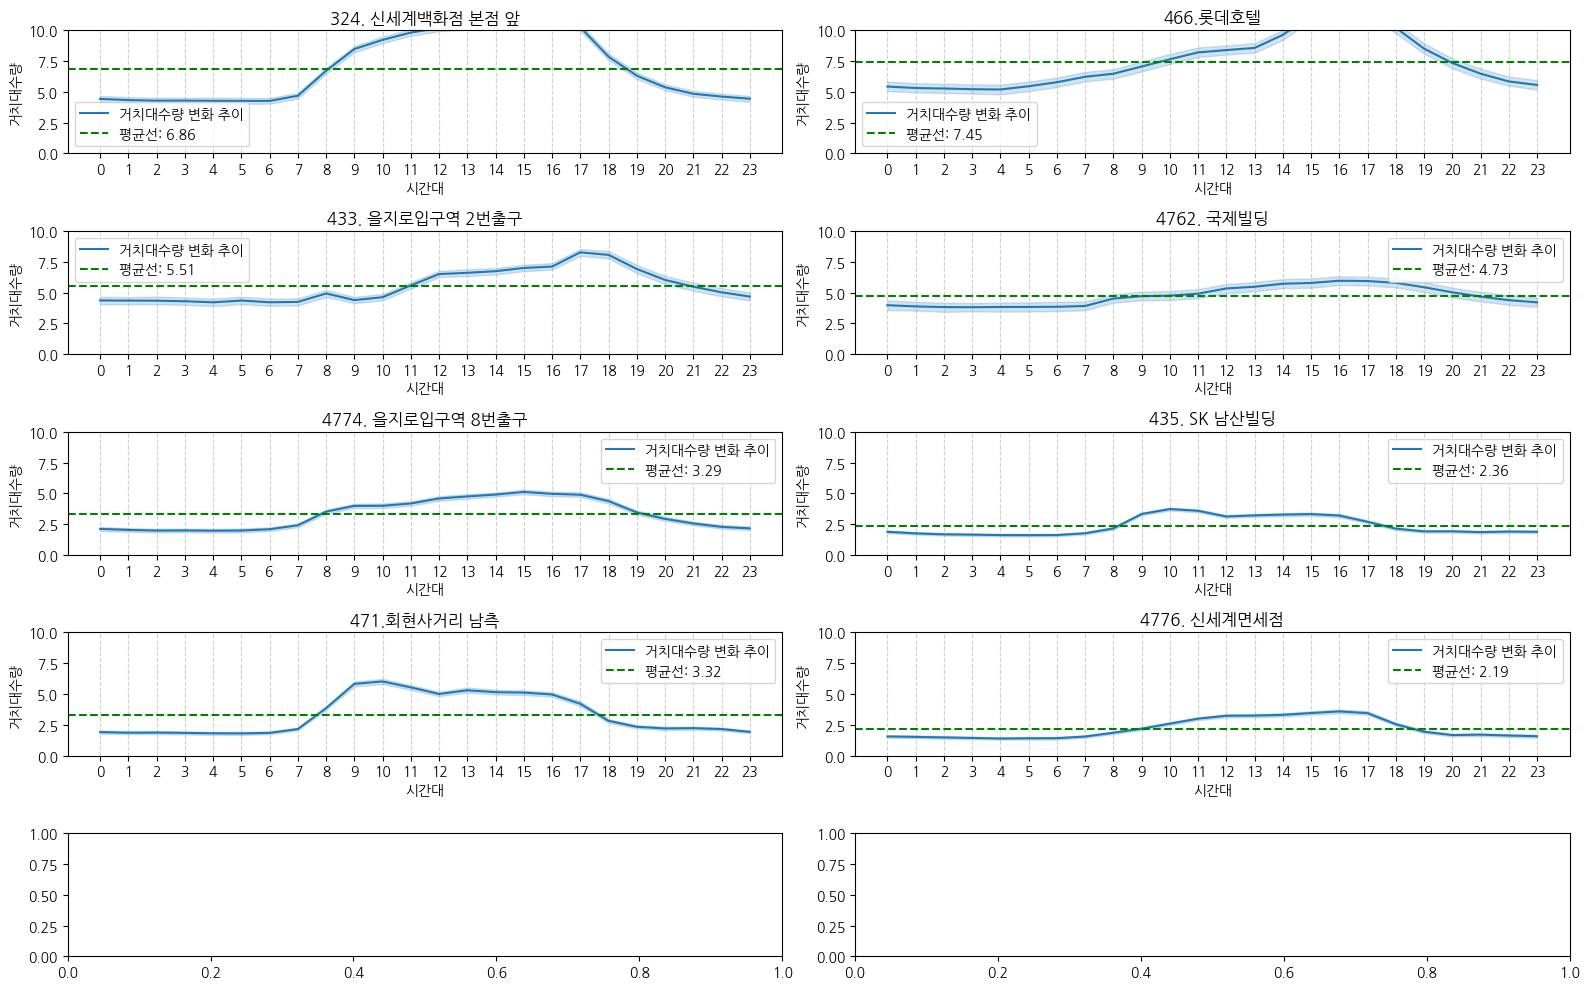

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_places = ['324. 신세계백화점 본점 앞', '466.롯데호텔', '433. 을지로입구역 2번출구', '4762. 국제빌딩','4774. 을지로입구역 8번출구','435. SK 남산빌딩','471.회현사거리 남측','4776. 신세계면세점']

fig, axes = plt.subplots(5, 2, figsize=(16, 10))  
axes = axes.flatten()  

for i, place in enumerate(selected_places):
    tmp_df = region_df[region_df['보관소(대여소)명'] == place].copy()
    tmp_df["변화량"] = region_df["거치대수량"].diff().fillna(0).abs()
    mean_value = tmp_df["거치대수량"].mean()

    ax = axes[i] 
    sns.lineplot(data=tmp_df, x='시간대', y='거치대수량', ax=ax, label="거치대수량 변화 추이")
    ax.axhline(y=mean_value, color="green", linestyle="--", label=f"평균선: {mean_value:.2f}")

    ax.set_title(f'{place}', fontsize=12)
    ax.set_xticks(range(0, 24))  
    ax.set_ylim(0, 10) 
    ax.grid(axis="x", linestyle="--", alpha=0.6)
    ax.legend()

plt.tight_layout() 
plt.show()

주요 쇼핑 중심지(예: 신세계백화점, 롯데호텔)는 저녁 시간에 감소폭이 큼.
교통 중심지(을지로입구역)에서는 아침과 저녁 시간대의 뚜렷한 피크가 있음.
모든 장소에서 아침부터 점차적으로 거치대 수량이 증가하고, 오후 이후로 감소하는 경향이 나타남. 이는 출퇴근 시간대의 영향을 받을 가능성이 높음.

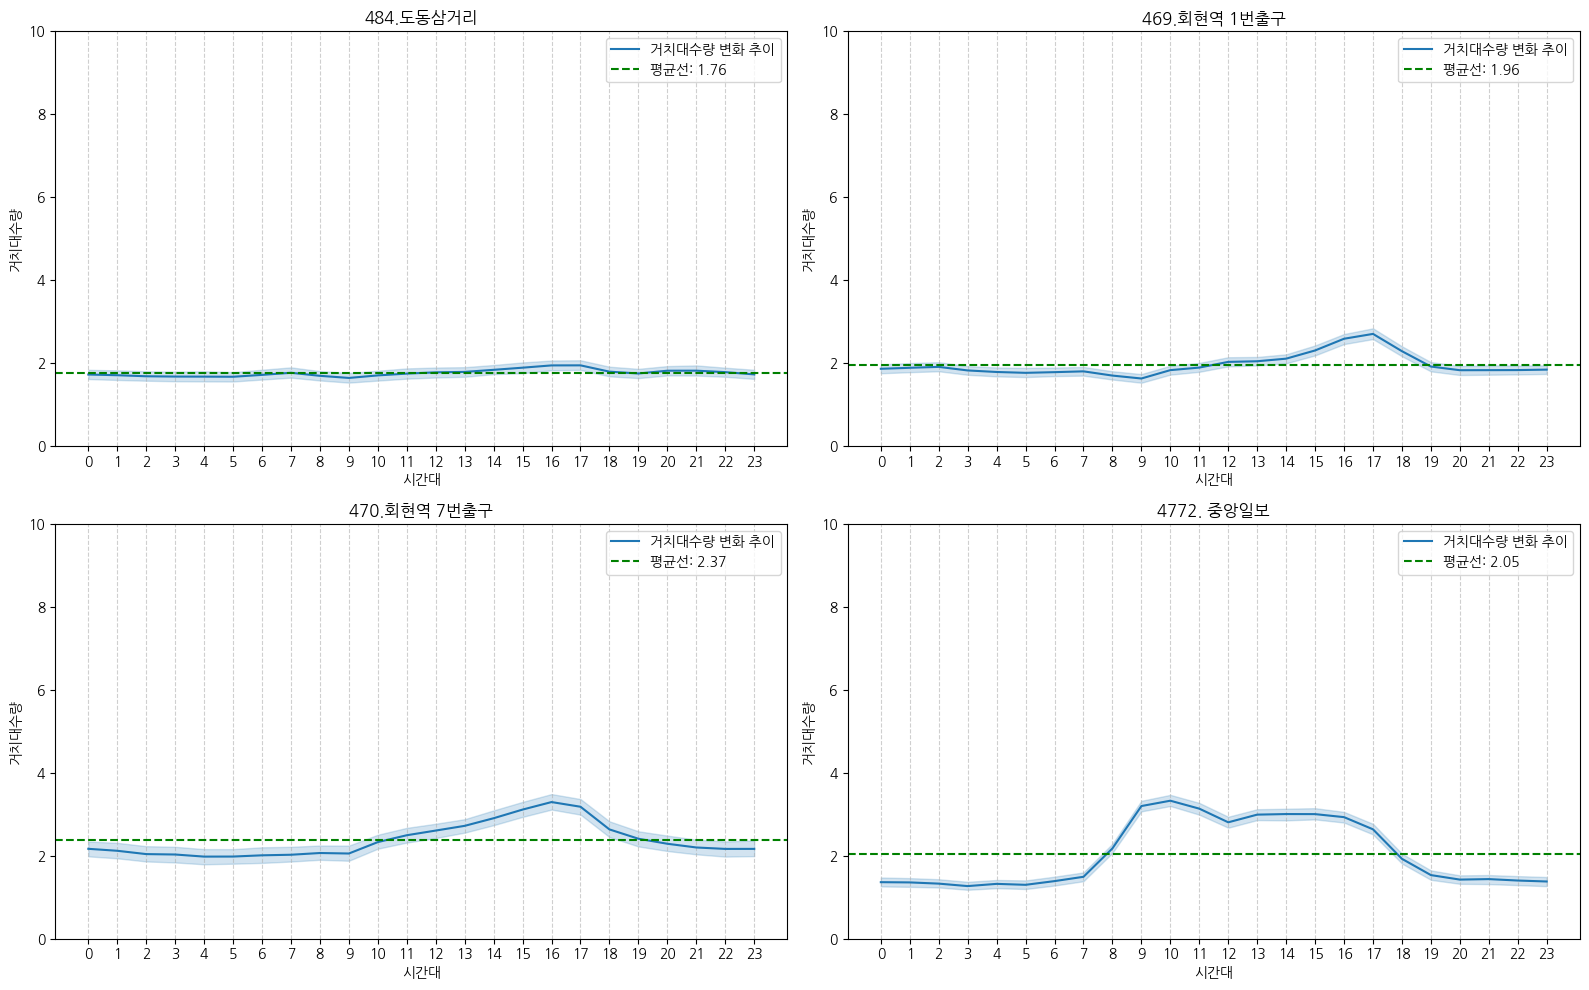

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_places = ['484.도동삼거리', '469.회현역 1번출구', '470.회현역 7번출구', '4772. 중앙일보']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  
axes = axes.flatten()  

for i, place in enumerate(selected_places):
    tmp_df = tmp_10[tmp_10['보관소(대여소)명'] == place].copy()
    tmp_df["변화량"] = tmp_df["거치대수량"].diff().fillna(0).abs()
    mean_value = tmp_df["거치대수량"].mean()

    ax = axes[i] 
    sns.lineplot(data=tmp_df, x='시간대', y='거치대수량', ax=ax, label="거치대수량 변화 추이")
    ax.axhline(y=mean_value, color="green", linestyle="--", label=f"평균선: {mean_value:.2f}")

    ax.set_title(f'{place}', fontsize=12)
    ax.set_xticks(range(0, 24))  
    ax.set_ylim(0, 10) 
    ax.grid(axis="x", linestyle="--", alpha=0.6)
    ax.legend()

plt.tight_layout() 
plt.show()

# 회현역 1번출구와 7번출구 분석

In [73]:
hh_1 = tmp_10['보관소(대여소)명'] == '469.회현역 1번출구'
hh_1 = tmp_10[hh_1].sort_values(['일시', '시간대'])
hh_1

,일시,대여소 번호,보관소(대여소)명,시간대,거치대수량,자치구,거치대수
81,2023-01-01,469,469.회현역 1번출구,0,1,중구,11
409,2023-01-01,469,469.회현역 1번출구,0,1,중구,11
737,2023-01-01,469,469.회현역 1번출구,0,1,중구,11
1065,2023-01-01,469,469.회현역 1번출구,0,1,중구,11
1393,2023-01-01,469,469.회현역 1번출구,0,1,중구,11
...,...,...,...,...,...,...,...
13262562,2023-12-31,469,469.회현역 1번출구,23,0,중구,11
13262900,2023-12-31,469,469.회현역 1번출구,23,0,중구,11
13263238,2023-12-31,469,469.회현역 1번출구,23,0,중구,11
13263576,2023-12-31,469,469.회현역 1번출구,23,0,중구,11


In [74]:
hh_7 = tmp_10['보관소(대여소)명'] == '470.회현역 7번출구'
hh_7 = tmp_10[hh_7].sort_values(['일시', '시간대'])
hh_7

,일시,대여소 번호,보관소(대여소)명,시간대,거치대수량,자치구,거치대수
82,2023-01-01,470,470.회현역 7번출구,0,3,중구,13
410,2023-01-01,470,470.회현역 7번출구,0,3,중구,13
738,2023-01-01,470,470.회현역 7번출구,0,3,중구,13
1066,2023-01-01,470,470.회현역 7번출구,0,3,중구,13
1394,2023-01-01,470,470.회현역 7번출구,0,3,중구,13
...,...,...,...,...,...,...,...
13262563,2023-12-31,470,470.회현역 7번출구,23,0,중구,13
13262901,2023-12-31,470,470.회현역 7번출구,23,0,중구,13
13263239,2023-12-31,470,470.회현역 7번출구,23,0,중구,13
13263577,2023-12-31,470,470.회현역 7번출구,23,0,중구,13


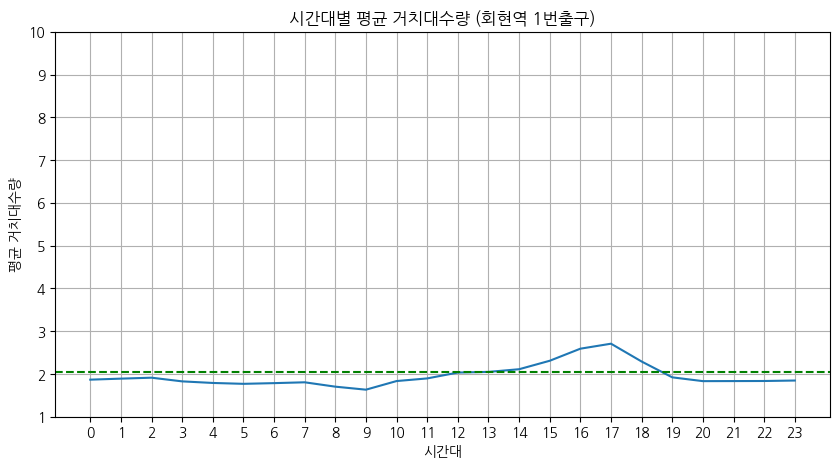

In [75]:
hh_1.groupby('시간대')['거치대수량'].mean().plot(kind='line', figsize=(10, 5))

mean_value = tmp_df["거치대수량"].mean()

plt.axhline(y=mean_value, color="green", linestyle="--", label=f"평균선: {mean_value:.2f}")
plt.title('시간대별 평균 거치대수량 (회현역 1번출구)')
plt.xlabel('시간대')
plt.ylabel('평균 거치대수량')
plt.grid()
plt.xticks(range(0, 24))
plt.ylim(1, 10)
plt.show()

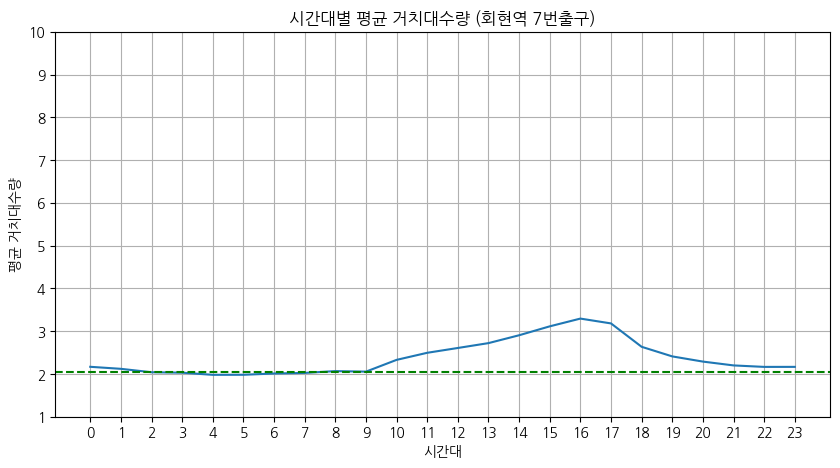

In [76]:
hh_7.groupby('시간대')['거치대수량'].mean().plot(kind='line', figsize=(10, 5))

mean_value = tmp_df["거치대수량"].mean()

plt.axhline(y=mean_value, color="green", linestyle="--", label=f"평균선: {mean_value:.2f}")
plt.title('시간대별 평균 거치대수량 (회현역 7번출구)')
plt.xlabel('시간대')
plt.ylabel('평균 거치대수량')
plt.grid()
plt.xticks(range(0, 24))
plt.ylim(1,10)
plt.show()

# 중구 결론 : 수요지수가 가장 높은 회현역 1번, 7번 출구 대여소를 분석

## 1. 회현역 주변 특성
- 회현역은 서울의 중심에 위치하며, 상업 및 업무지구가 밀집된 지역으로, 대중교통 접근성이 뛰어납니다.
    - 주변에 남대문시장, 롯데백화점 본점, 명동 쇼핑거리 등이 위치하여 관광객 및 쇼핑객이 많습니다.
    - 퇴근 시간대에는 직장인들의 이동과 더불어 주변 상업시설 방문 수요가 겹쳐 자전거 대여 수요가 집중될 가능성이 있습니다.
- 회현역이 서울역과 인접하여, 기차/공항철도를 이용하는 사람들의 마지막 이동 수단으로 따릉이가 사용될 가능성이 높습니다.
    - 특히, 공항철도를 이용하는 관광객들이 서울역 도착 후 이동 시 따릉이를 사용하는 경우, 회현역에서 자전거 반납이 이루어지지 않고 다른 대여소로 이동할 수 있습니다.

## 2. 퇴근 시간대 수요 감소와 대여소 공급 부족
- 중구의 높은 주간인구지수는 직장인 및 상업 활동 인구가 많다는 것을 의미하며, 퇴근 시간대에 인구가 급격히 빠져나간다는 점을 나타냅니다.
    - 이로 인해 회현역 1번, 7번 출구 대여소에서 퇴근 후 대여 수요가 폭발적으로 증가하면서 거치대수량이 급격히 감소합니다.
- 거치대 부족 문제:
    - 대여소의 총 거치대 수가 수요를 감당하지 못해 자전거 반납이 불가능한 경우, 다른 대여소로 이동하게 되어 반납 분산 현상이 발생할 수 있습니다.
    - 상위권 10개 구역의 평균 거치대 수는 18.6개로 회현역 1번과 7번 출구 대여소의 각각의 거치대 수는 11개와 13개가 있습니다.

## 3. 인근 대여소와의 관계
- 회현역 1번, 7번 출구 대여소는 모두 서울역과 가까운 위치에 있어, 주변 대여소 간 자전거 흐름 불균형이 발생할 가능성이 큽니다.
    - 서울역 주변 대여소에서 자전거가 소진되고, 반납은 외곽 대여소에 집중되는 현상이 나타날 수 있습니다.
    회현역 대여소의 주요 문제점

## 4. 수요 분석
- 회현역 주변 주요 이용층과 시간대별 패턴 분석을 통해 수요 특성을 파악했습니다.
    -  관광객(남대문시장, 남산케이블카), 직장인(2호선 환승, 상업지역), 쇼핑객(신세계백화점,면세점), 안경 업종 종사자 등이 주요 이용층입니다.
## 5. 수요 불균형 원인
- 퇴근 시간 전까지 거치대 평균이 높아지고, 퇴근 시간에는 다시 낮아지는 패턴입니다.
- 수도권 내 안경점 수 1위, 주변 상권(남대문시장, 신세계백화점 본점, 숭례문 등)의 높은 수요 대비 거치대 수량 부족합니다.
        
## 6. 회현역에서 따릉이를 타고 이동한 경로 추정
- 환승 불편: 회현역에서 1호선을 갈아타고 2호선을 다시 환승하는 번거로움 존재합니다.
- 따릉이를 이용한 이동: 회현역에서 을지로입구역, 시청역 등 2호선 역으로 이동하는 것이 효율적이라는 추정합니다.
    - 데이터 근거: 회현역에서 가까운 대여소의 시간대별 평균 분석 결과, 주변 역 정류소는 대부분 과포화 상태(거치된 따릉이가 거치대 수량을 초과)입니다.
    - 회현역 대여소가 가장 가까워 많은 이용객들이 회현역에서 따릉이를 빌려 2호선 역으로 이동했을 가능성이 있습니다.

## 7. 해결 방안 제안
- 1km반경 내 대여소 분석
- 3, 4, 5번 출구 대여소 설치 어려움이 있습니다.
    -  원동기 정류소와 좁은 인도로 인해 추가 설치 공간 부족합니다.
    -  원동기 정류소 수를 줄이고 따릉이 대여소 설치를 제안합니다.
- 1, 7번 출구 대여소 확충:
    -  1번, 7번 출구는 추가 설치 여건이 충분합니다.
    - 기존 정류소를 확장하거나 거치대 수량을 늘리는 방안이 적합합니다.
    

## 8. 그외에 수요지수가 높은 대여소
    - 수요지수가 높은 다른 대여소들도 모두 개선이 필요합니다.